In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

#### 데이터 준비

In [3]:
df_iris = pd.read_csv('data/iris.csv').iloc[:,1:]
df_iris.head()

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0            5.1           3.5            1.4           0.2  Iris-setosa
1            4.9           3.0            1.4           0.2  Iris-setosa
2            4.7           3.2            1.3           0.2  Iris-setosa
3            4.6           3.1            1.5           0.2  Iris-setosa
4            5.0           3.6            1.4           0.2  Iris-setosa

### 데이터 전처리

In [15]:
# ----------------
# target 인코딩
# ----------------
class_names = {'Iris-setosa':0,
               'Iris-versicolor':1,
               'Iris-virginica':2}
df_iris['target'] = df_iris['Species'].map(class_names)

#### 데이터 선택

In [5]:
# ----------------
# X, y
# ----------------
X = df_iris.drop(['Species', 'target'], axis=1)
y = df_iris['target']

#### 학습용 데이터와 테스트용 데이터 분할

In [6]:
# ----------------
# 균등분할
#   stratify
# ----------------

from sklearn.model_selection import train_test_split

# 학습용 데이터와 테스트용 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X
                                                    , y
                                                    , test_size=0.2
                                                    , random_state=42
                                                    , stratify=y)

# 데이터의 크기 확인
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(120, 4) (30, 4) (120,) (30,)


In [7]:
print(pd.Series(y_train).value_counts())
print(pd.Series(y_test).value_counts())

target
0    40
2    40
1    40
Name: count, dtype: int64
target
0    10
2    10
1    10
Name: count, dtype: int64


#### 모델 생성 및 학습

In [9]:
# ---------------------------------------
# DecisionTreeClassifier 모델 생성
# ---------------------------------------
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=42)

# ---------------------------------------
# 모델 학습
# ---------------------------------------
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

#### 모델 평가

In [10]:
# ---------------------------------------
# 테스트용 데이터로 예측 
# ---------------------------------------
pred = model.predict(X_test)
print("예측label>>",pred)
print("실제label>>",y_test.values)

예측label>> [0 2 1 1 0 1 0 0 2 1 2 2 2 1 0 0 0 1 1 2 0 2 1 1 2 2 1 0 2 0]
실제label>> [0 2 1 1 0 1 0 0 2 1 2 2 2 1 0 0 0 1 1 2 0 2 1 2 2 1 1 0 2 0]


In [11]:
# ---------------------------------------
# 정확도 평가
# ---------------------------------------
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, pred)
print(f"예측정확도 >> {accuracy:.2f}")

예측정확도 >> 0.93


In [12]:
# ---------------------------------------
# 분류 모델의 평가지표 리포트
#   support : 해당 클래스의 표본 수
#   macro avg : 클래스 별 지표의 단순 평균
#   weighted avg 
#       클래스별 지표(precision‧recall‧f1-score)를 해당 클래스의 샘플 수(support)로 가중평균한 값
#       데이터 불균형이 있을 때 전체 모델 성능을 현실적으로 보여준다
#       weighted ave 값이 매우 높으면 다수 클래스가 모델 평가의 대부분을 차지한다는 의미
# ---------------------------------------
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      0.90      0.90        10
           2       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



#### 분류 모델의 학습 결과

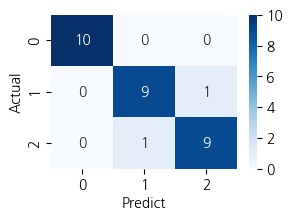

In [13]:
# --------------------------------
# 혼동행렬 (행=실제, 열=예측)
# --------------------------------
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, pred, labels=[0,1,2])

plt.figure(figsize=(3,2))
sns.heatmap(cm, cmap='Blues', annot=True)
plt.xlabel('Predict')
plt.ylabel('Actual')
pass


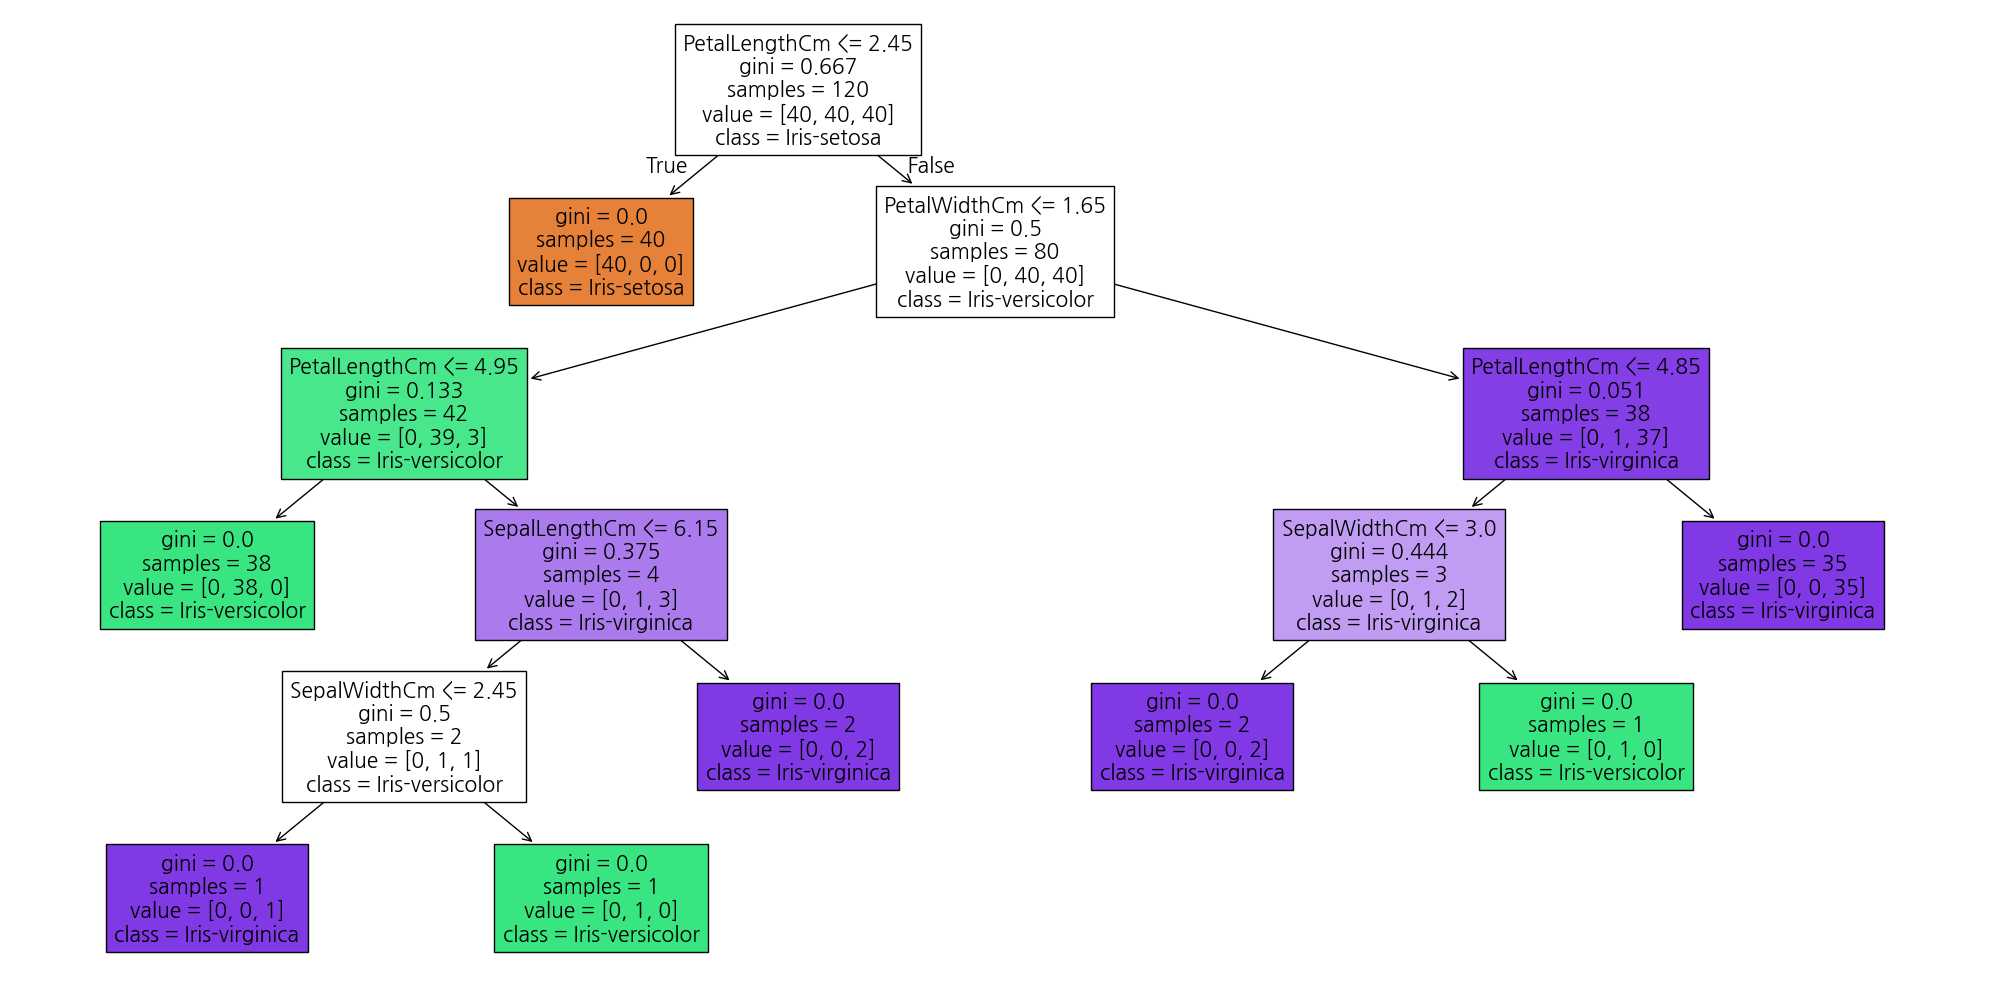

In [19]:
# 트리 시각화
from sklearn.tree import plot_tree
plt.figure(figsize=(20,10))
plot_tree(model,
          feature_names=X_train.columns,
          class_names=list(class_names.keys()),
          filled=True
          )
plt.tight_layout()
plt.show()

In [20]:
# --------------------------
# 트리의 깊이
#   get_depth()
# --------------------------
print(model.get_depth())

5


In [ ]:
# --------------------------
# feature_importances_
# --------------------------
print(f'특성의 중요도 >>> {model.feature_importances_}')

plt.figure(figsize=(4,3))
sns.barplot(y=X_train.columns, x=model.feature_importances_);


특성의 중요도 >>> [0.00625    0.02916667 0.5585683  0.40601504]


NameError: name 'iris' is not defined

<Figure size 400x300 with 0 Axes>